## Übung 2

### Problem 2.1 - Lineare Regression mit Least Squares

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

Numpy Dokumentation: [`numpy.genfromtxt`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html)

Laden der Daten inklusive Header.

In [2]:
def print_sample(genfromtxt):
    
    # column names
    print(genfromtxt.dtype.names)
    
    # data
    for row in genfromtxt[:min((len(genfromtxt), 10))]:
        print(row)

# laden der daten mit numpy
x_y = np.genfromtxt('experiment1.csv', delimiter=',', names=True)
loss_qoe = np.genfromtxt('experiment2.csv', delimiter=',', names=True)

print_sample(x_y)
print_sample(loss_qoe)

('x', 'y')
(0.056784, 0.083319)
(0.26073, 0.021207)
(0.029896, 0.075811)
(0.42408, 0.17198)
(0.34106, 0.073962)
(0.54135, 0.22248)
(0.92617, 0.82876)
(0.2985, 0.048244)
(0.33808, 0.11726)
(0.85948, 0.70721)
('loss', 'qoe')
(0.52355, 1.4152)
(0.26084, 2.2719)
(0.49308, 1.3619)
(0.85584, 1.1463)
(0.72441, 1.0478)
(0.19911, 2.455)
(0.15729, 2.6471)
(0.37048, 1.6344)
(0.86227, 1.1464)
(0.68476, 1.0245)


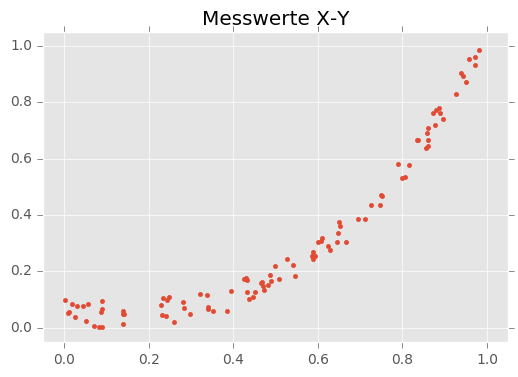

In [3]:
# extraktion der x und y werte
xs = [i[0] for i in x_y]
ys = [i[1] for i in x_y]

# plot in punkten. andere darstellung zb durch - oder o
plt.plot(xs, ys, '.')

# hinzufuegen eines innenabstands zum plot
x_min, x_max, y_min, y_max = plt.axis()
plt.axis((x_min - .05, x_max + .05, y_min - .05, y_max + .05))
plt.title('Messwerte X-Y')

plt.show()

#### Versuch zur Bestimmung einer linearen Gleichungsfunktion.

Hier wird die händische Berechnung durchgeführt. Im späteren Verlauf wird auf die Funktion [`scipy.optimize.curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) verwendet. Eine Gleichung dazu ist in der Form $f(x) = \alpha + \beta x$ mit

$\beta = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$

$\alpha = \bar{y} - \beta\bar{x}$

$\bar{x} = \frac{\sum_{i=1}^{n}x_i}{n}$ und $\bar{y} = \frac{\sum_{i=1}^{n}y_i}{n}$

[Siehe Wikipedia](https://de.wikipedia.org/wiki/Methode_der_kleinsten_Quadrate#Spezialfall_einer_einfachen_linearen_Ausgleichsgeraden)

Formel: f(x) = -0.132 + 0.874x


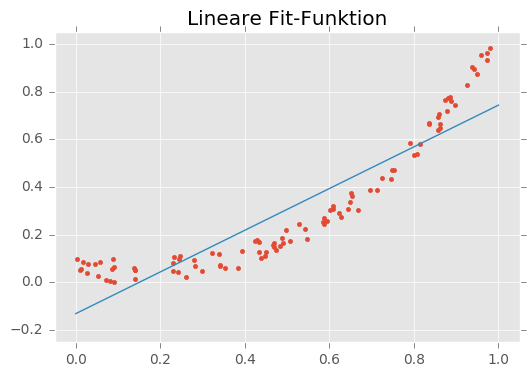

In [4]:
x_avg = sum(xs) / len(xs)
y_avg = sum(ys) / len(ys)

b_numerator = sum([(xs[i] - x_avg) * (ys[i] - y_avg) for i in range(len(xs))])
b_denominator = sum([np.power(xs[i] - x_avg, 2) for i in range(len(xs))])
b = b_numerator / b_denominator
a = y_avg - b * x_avg

print('Formel: f(x) = {:.3f} + {:.3f}x'.format(a, b))

# plot der punkte
xs = [i[0] for i in x_y]
ys = [i[1] for i in x_y]
plt.plot(xs, ys, '.')

# plot der linearen funktion mit gegebenen x werten
plt.plot((0, 1), (a, a + b))

x_min, x_max, y_min, y_max = plt.axis()
plt.axis((x_min - .05, x_max + .05, y_min - .05, y_max + .05))

plt.title('Lineare Fit-Funktion')
plt.show()

### 2.1.1 Polynom-Fit

Es sollen die Koeffizienten $\beta$ zu Polynomen der Grade 1,2 und 3 bestimmt werden.

$f(x) = a + bx$

$f(x) = a + bx + cx^2$

$f(x) = a + bx + cx^2 + dx^3$

Zuvor wurde bereits das Polynom ersten Grades durch die lineare Gleichungsfunktion bestimmt, muss also nicht mehr ermittelt werden. Im Folgenden werden die Koeffizienten lediglich mit Hilfe der Funktion [`scipy.optimize.curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) bestimmt.

[Least Squares Fitting in Python](https://python4mpia.github.io/fitting_data/least-squares-fitting.html)

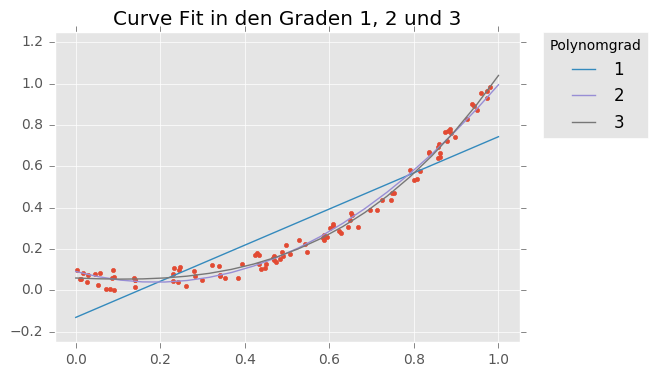

In [5]:
from scipy.optimize import curve_fit

poly_1 = lambda x, a, b: a + b*x
poly_2 = lambda x, a, b, c: a + b*x + c*x*x
poly_3 = lambda x, a, b, c, d: a + b*x + c*x*x + d*x*x*x

# plot der punkte
xs = [i[0] for i in x_y]
ys = [i[1] for i in x_y]
plt.plot(xs, ys, '.')

# im folgenden enthalten popt die koeffizienten der jeweiligen funktionen
# pcov ist das 2d-array was die kovarianz matrix enthaelt

x_points = np.linspace(0, 1, 20)

def plot_fit(func, label, x, y):
    """Fuehrt ein curve fit mit gegebener Funktion und
    x und y Werten aus. Das Ergebnis wird mit dem 
    gegebenen Label geplottet.
    """
    popt, pcov = curve_fit(func, x, y)
    y_i = [func(_x, *popt) for _x in x_points]
    plt.plot(x_points, y_i, label=label)
    
plot_fit(poly_1, '1', xs, ys)
plot_fit(poly_2, '2', xs, ys)
plot_fit(poly_3, '3', xs, ys)

x_min, x_max, y_min, y_max = plt.axis()
plt.axis((x_min - .05, x_max + .05, y_min - .05, y_max + .05))

# legende hinzufuegen
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Polynomgrad')
plt.title('Curve Fit in den Graden 1, 2 und 3')
plt.show()

### 2.1.2 Plot der Residuen

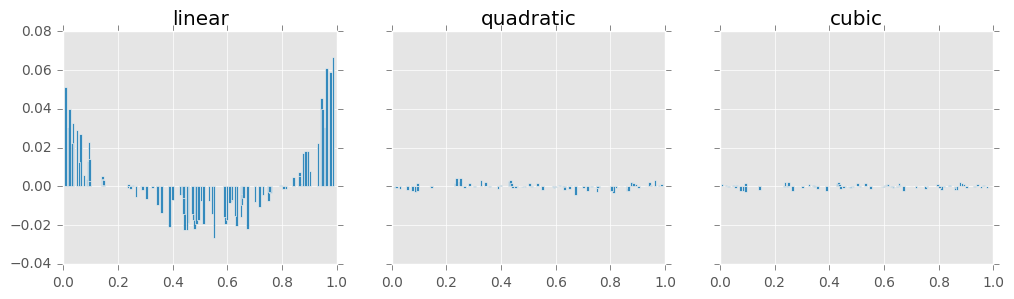

In [6]:
def calc_residuals(func, x, y):
    
    popt, pcov = curve_fit(func, x, y)
    
    # r^2 an der stelle x_i
    r_squares = [np.power(y[i] - func(x[i], *popt), 2) for i in range(len(x))]
    
    # hinzufuegen des vorzeichens
    r_squared_unsigned = [-r_squares[i] if y[i] < func(x[i], *popt) 
                          else r_squares[i] for i in range(len(r_squares)) ]
    
    return r_squared_unsigned
    
f, axes = plt.subplots(ncols=3, nrows=1, sharex=True, sharey=True, figsize=(12, 3))
ax1, ax2, ax3 = axes.ravel()

ax1.set_title('linear')
linear_r = calc_residuals(poly_1, xs, ys)
ax1.bar(xs, linear_r, width=.01)

quadratic_r = calc_residuals(poly_2, xs, ys)
ax2.set_title('quadratic')
ax2.bar(xs, quadratic_r, width=.01)

cubic_r = calc_residuals(poly_3, xs, ys)
ax3.set_title('cubic')
ax3.bar(xs, cubic_r, width=.01)

plt.show()

### 2.1.3 Bestimmung der Anpassungsgüte

In [7]:
from IPython.display import display, Math

def sums_r(func, x, y):
    popt, pcov = curve_fit(func, x, y)
    return sum([(y[i] - func(x[i], *popt)) ** 2 for i in range(len(x))])
    
sums_r_linear = sums_r(poly_1, xs, ys)
sums_r_quadratic = sums_r(poly_2, xs, ys)
sums_r_cubic = sums_r(poly_3, xs, ys)

display(Math(r'{:s} = {:.5f}'.format('SS_r(linear)', sums_r_linear)))
display(Math(r'{:s} = {:.5f}'.format('SS_r(quadratic)', sums_r_quadratic)))
display(Math(r'{:s} = {:.5f}'.format('SS_r(cubic)', sums_r_cubic)))
print()

def sums_tot(func, y):
    yd = sum(y) / len(y)
    return sum(np.power(np.array(y) - yd, 2))
    # equivalent: return sum([(ys[i] - yd) ** 2 for i in range(len(ys))])
    
def r_squared(sums_r_value, sums_tot_value):
    return 1 - sums_r_value / sums_tot_value


display(Math(r'{:s} = {:.5f}'.format('R^2(linear)', r_squared(sums_r_linear, sums_tot(poly_1, ys)))))
display(Math(r'{:s} = {:.5f}'.format('R^2(quadratic)', r_squared(sums_r_quadratic, sums_tot(poly_2, ys)))))
display(Math(r'{:s} = {:.5f}'.format('R^2(cubic)', r_squared(sums_r_cubic, sums_tot(poly_3, ys)))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 2.1.4 Betrachtung Videostreamdaten

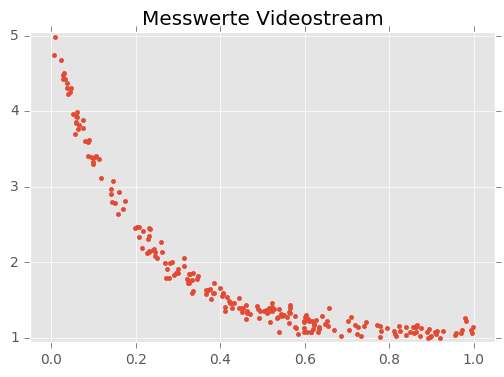

In [8]:
x_vid = [i[0] for i in loss_qoe]
y_vid = [i[1] for i in loss_qoe]
plt.plot(x_vid, y_vid, '.')

x_min, x_max, y_min, y_max = plt.axis()
plt.axis((x_min - .05, x_max + .05, y_min - .05, y_max + .05))
plt.title('Messwerte Videostream')

plt.show()

#### Test über Exponentialfunktion

$f(x) = a e^{-bx} + c$

Zur Erinnerung folgt die Darstellung der e-Funktionen

$f(x) = e^x$ und $f(x) = e^{-x}$

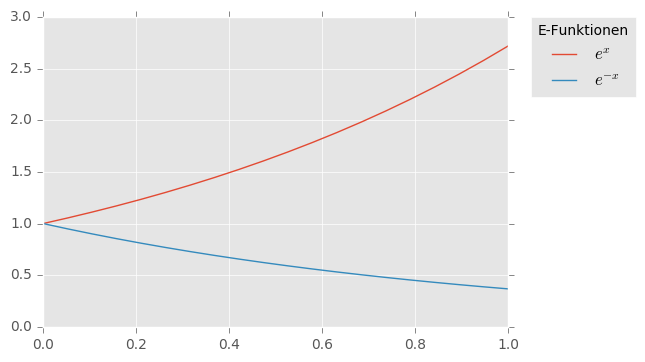

In [9]:
x_e = np.linspace(0, 1, 20)
y_e = np.exp(x_e)

plt.plot(x_e, y_e, '-', label=r'$e^x$')

y_e = np.exp(-x_e)
plt.plot(x_e, y_e, '-', label=r'$e^{-x}$')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='E-Funktionen')
plt.show()

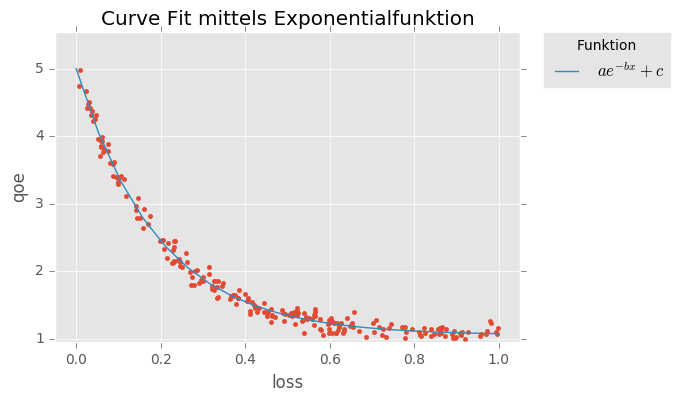

In [10]:
# plot der rohdaten
x_vid = [i[0] for i in loss_qoe]
y_vid = [i[1] for i in loss_qoe]
plt.plot(x_vid, y_vid, '.')

# Curve fitting funktion
e_func = lambda x, a, b, c: a * np.exp(-b * x) + c

# plot des fits
plot_fit(e_func, r'$a e^{-bx} + c$', x_vid, y_vid)

x_min, x_max, y_min, y_max = plt.axis()
plt.axis((x_min - .05, x_max + .05, y_min - .05, y_max + .05))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Funktion')
plt.title('Curve Fit mittels Exponentialfunktion')
plt.ylabel('qoe')
plt.xlabel('loss')
plt.show()

In [11]:
sums_r_exp = sums_r(e_func, x_vid, y_vid)
display(Math(r'{:s} = {:.5f}'.format('SS_r(exp)', sums_r_exp)))
display(Math(r'{:s} = {:.5f}'.format('R^2(exp)', r_squared(sums_r_exp, sums_tot(e_func, y_vid)))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Das Residuenquadrat enthält eine sehr gute Annäherung. Trotzdem wird im Plot ein vermeintlich großer Abstand dargestellt. Dieser ist auf die höhere Verteilung auf y-Werten zurückzuführen. Später wird das genauer erkennbar, wenn mit den Residuenquadraten der Polynome verglichen wird.

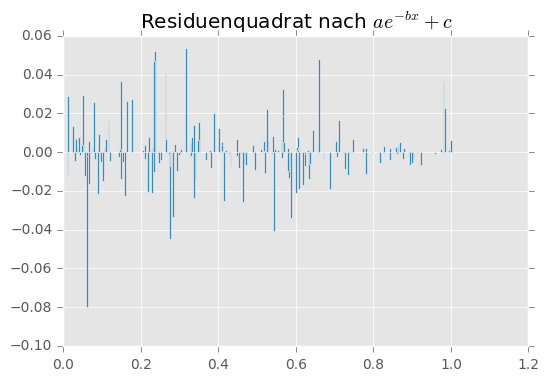

In [12]:
residuals_e = calc_residuals(e_func, x_vid, y_vid)
plt.title(r'Residuenquadrat nach $a e^{-bx} + c$')
plt.bar(x_vid, residuals_e, width=.005)
plt.show()

### 2.1.5 Bewertung mit Polynomen

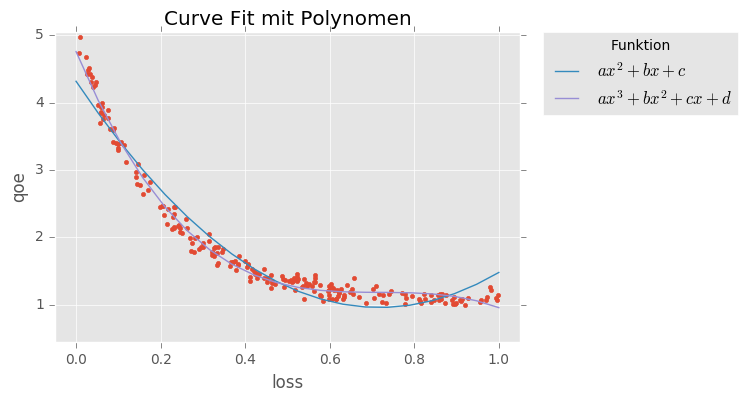

In [13]:
x_vid = [i[0] for i in loss_qoe]
y_vid = [i[1] for i in loss_qoe]
plt.plot(x_vid, y_vid, '.')

plot_fit(poly_2, r'$ax^2 + bx + c$', x_vid, y_vid)
plot_fit(poly_3, r'$ax^3 + bx^2 + cx + d$', x_vid, y_vid)

x_min, x_max, y_min, y_max = plt.axis()
plt.axis((x_min - .05, x_max + .05, y_min - .05, y_max + .05))

# legende hinzufuegen
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Funktion')
plt.title('Curve Fit mit Polynomen')
plt.ylabel('qoe')
plt.xlabel('loss')
plt.show()

#### Darstellung der Residuenquadrate der Polynome neben der Exponentialfunktion

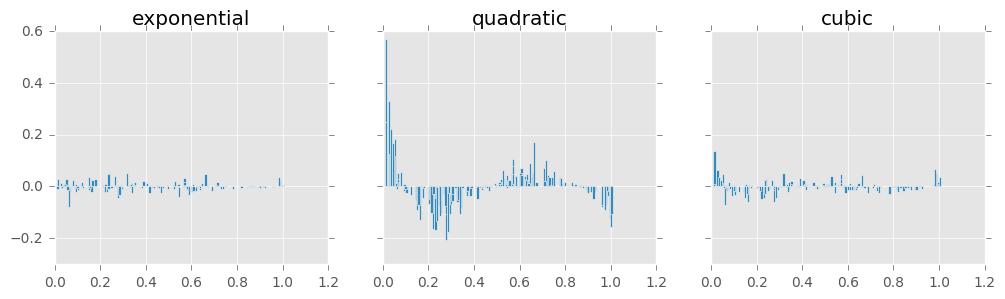

In [14]:
f, axes = plt.subplots(ncols=3, nrows=1, sharex=True, sharey=True, figsize=(12, 3))
ax1, ax2, ax3 = axes.ravel()

residuals_e = calc_residuals(e_func, x_vid, y_vid)
ax1.set_title(r'exponential')
ax1.bar(x_vid, residuals_e, width=.01)

quadratic_r = calc_residuals(poly_2, x_vid, y_vid)
ax2.set_title('quadratic')
ax2.bar(x_vid, quadratic_r, width=.01)

cubic_r = calc_residuals(poly_3, x_vid, y_vid)
ax3.set_title('cubic')
ax3.bar(x_vid, cubic_r, width=.01)

plt.show()

#### Summe der Residuenquadrate

In [15]:
sums_r_quadratic = sums_r(poly_2, x_vid, y_vid)
sums_r_cubic = sums_r(poly_3, x_vid, y_vid)

display(Math(r'{:s} = {:.5f}'.format('R^2(exp)', r_squared(sums_r_exp, sums_tot(e_func, y_vid)))))
display(Math(r'{:s} = {:.5f}'.format('R^2(quadratic)', r_squared(sums_r_quadratic, sums_tot(poly_2, y_vid)))))
display(Math(r'{:s} = {:.5f}'.format('R^2(cubic)', r_squared(sums_r_cubic, sums_tot(poly_3, y_vid)))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>